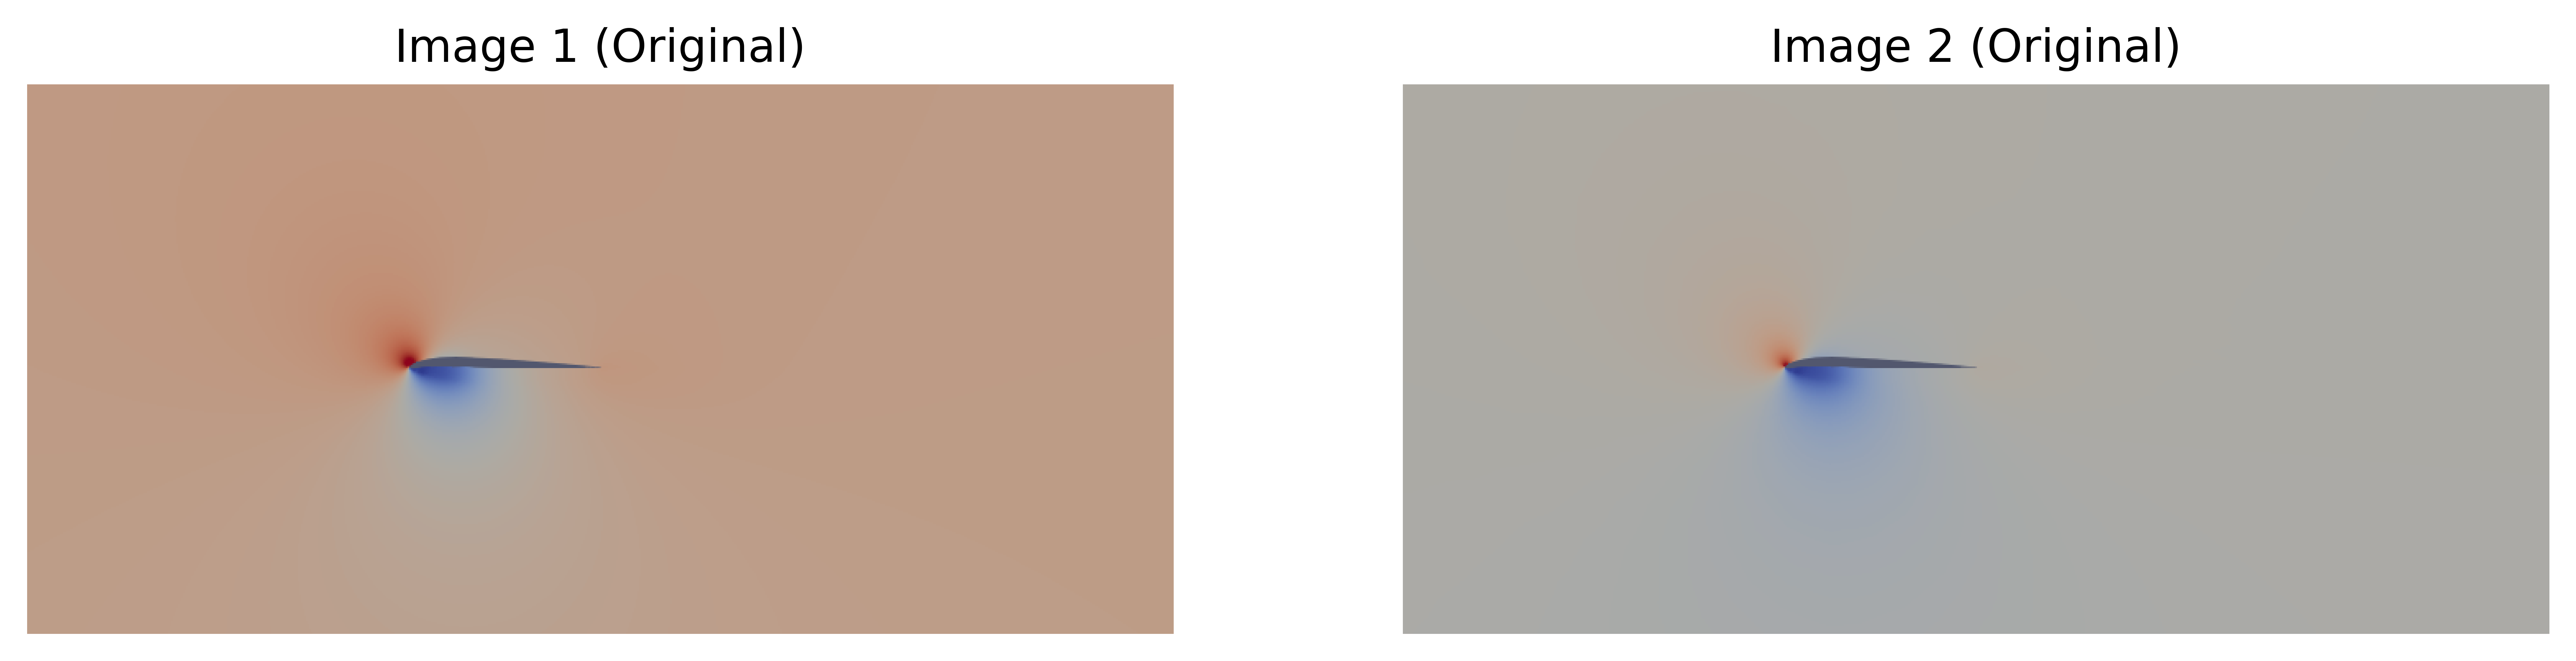

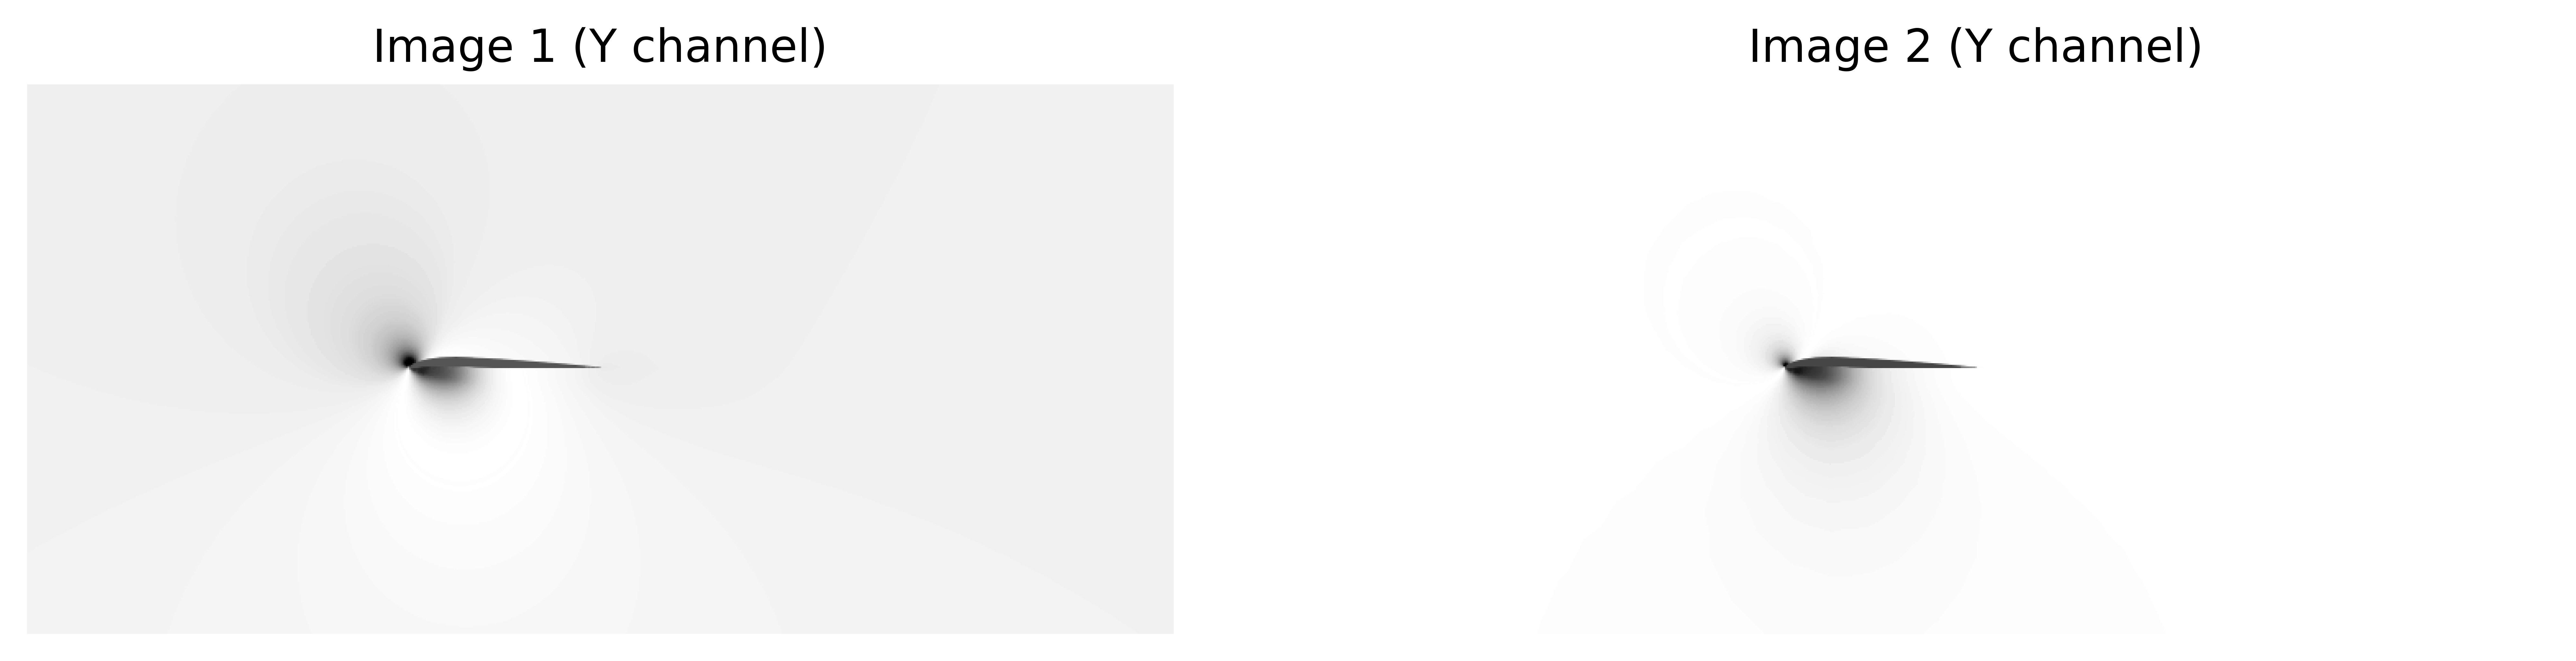

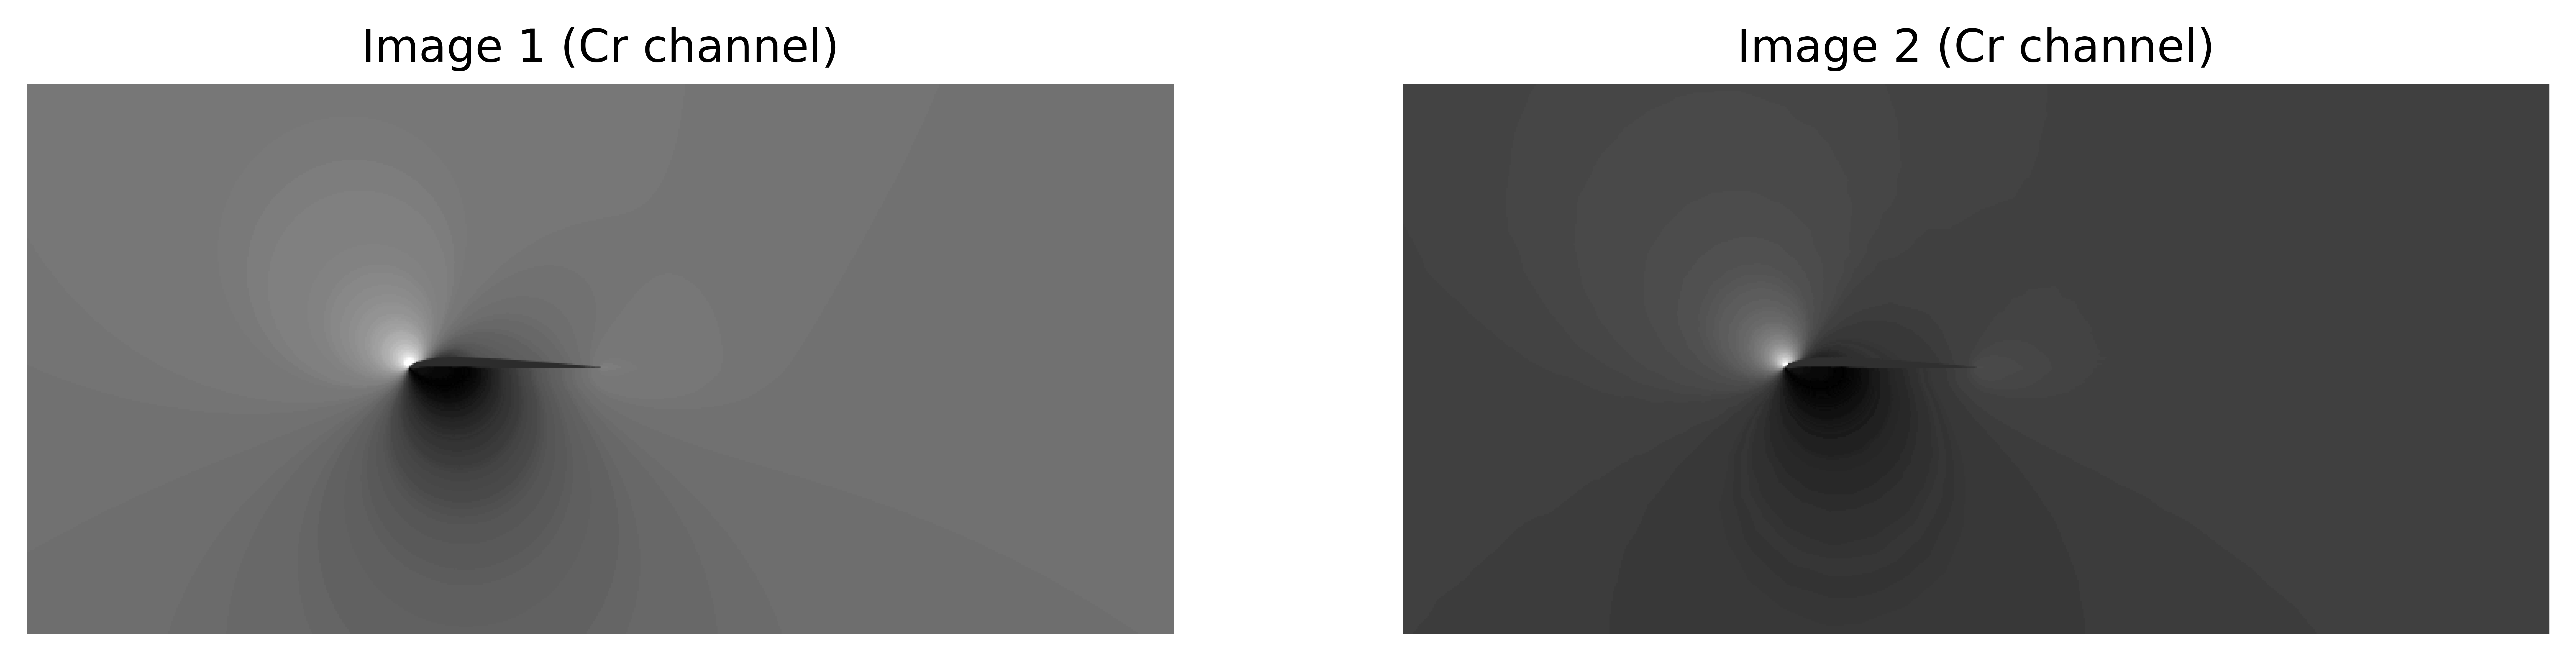

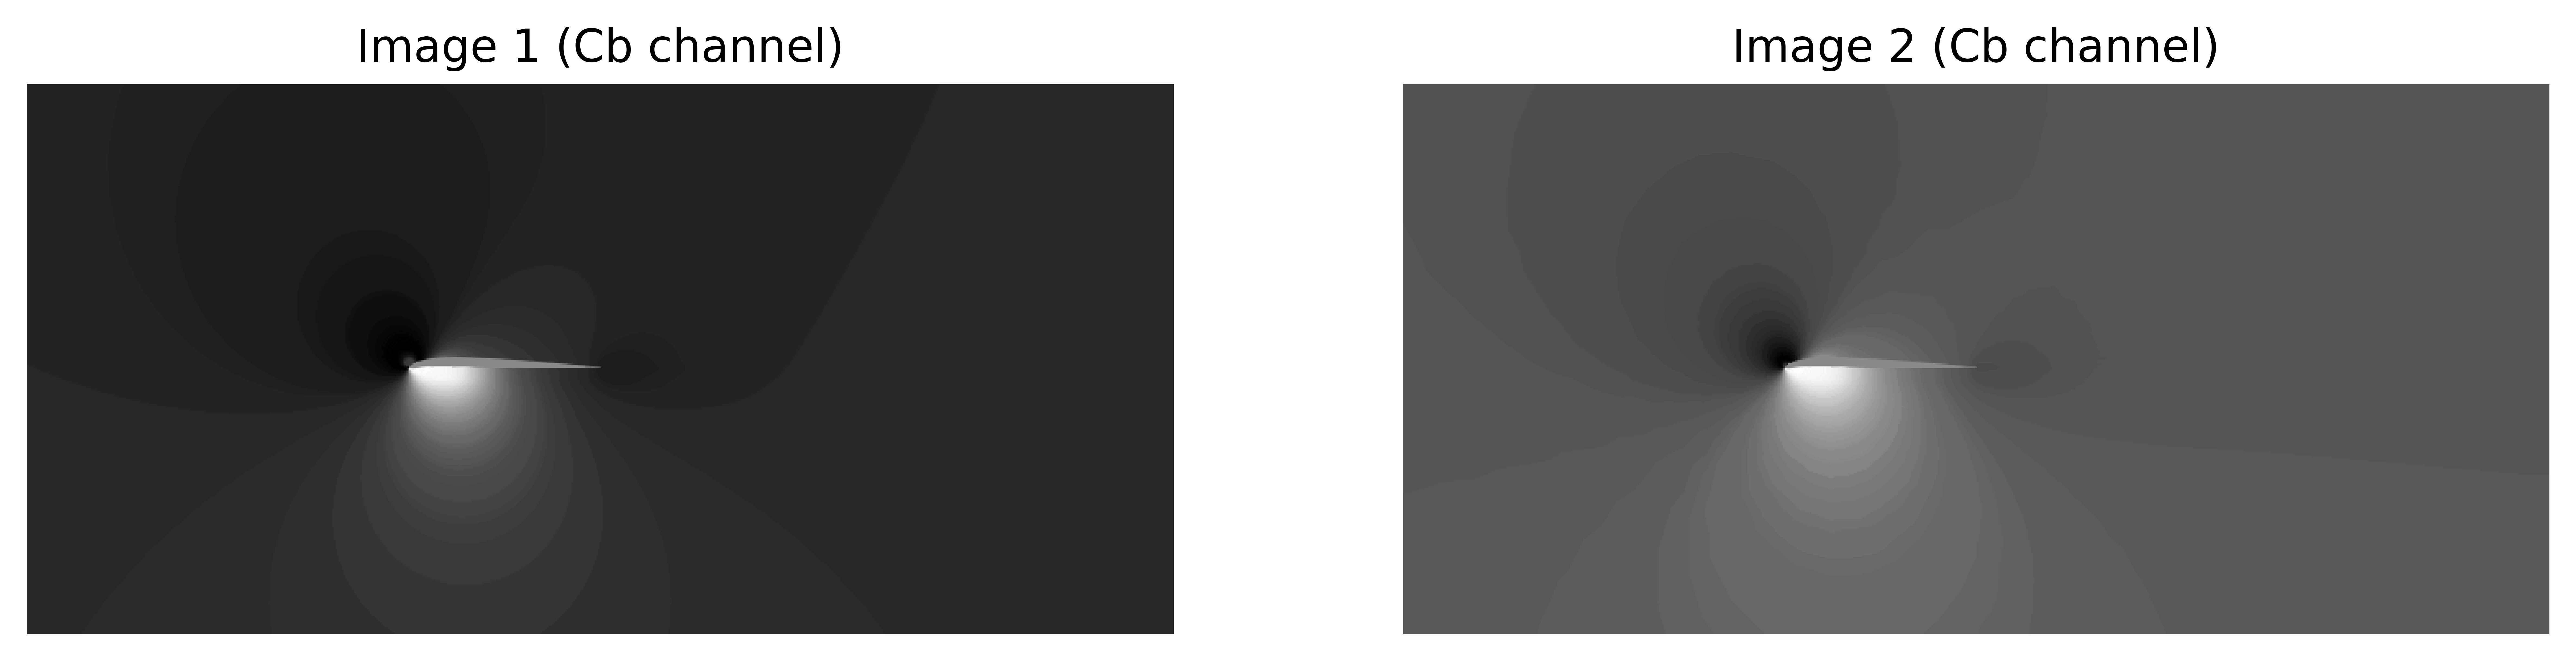

In [32]:
# read image airfRANS_cropped_p.png
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

def load_and_display_image(image1path, image2path):
    """
    Load an image from the specified path and display it.
    
    Parameters:
    image_path (str): Path to the image file.
    """
    # Load the images
    image1 = Image.open(image1path)
    image2 = Image.open(image2path)

    # Convert PIL images to numpy arrays (RGB)
    image1_np = np.array(image1)
    image2_np = np.array(image2)

    # Convert RGB to YCrCb color space using OpenCV
    image1_ycrcb = cv2.cvtColor(image1_np, cv2.COLOR_RGB2YCrCb)
    image2_ycrcb = cv2.cvtColor(image2_np, cv2.COLOR_RGB2YCrCb)

    # Crop images: y from 220 to 555, x from 256 to 955
    image1_ycrcb = image1_ycrcb[220:555, 256:955]
    image2_ycrcb = image2_ycrcb[220:555, 256:955]

    # Display the original images
    plt.figure(figsize=(12, 12), dpi=1000)
    plt.subplot(1, 2, 1)
    plt.imshow(image1_np[220:555, 256:955])
    plt.axis('off')
    plt.title('Image 1 (Original)')
    plt.subplot(1, 2, 2)
    plt.imshow(image2_np[220:555, 256:955])
    plt.axis('off')
    plt.title('Image 2 (Original)')
    plt.show()
    # Display the Y channel only for visualization
    plt.figure(figsize=(12, 12), dpi=1000)
    plt.subplot(1, 2, 1)
    plt.imshow(image1_ycrcb[..., 0], cmap='gray')
    plt.axis('off')
    plt.title('Image 1 (Y channel)')
    plt.subplot(1, 2, 2)
    plt.imshow(image2_ycrcb[..., 0], cmap='gray')
    plt.axis('off')
    plt.title('Image 2 (Y channel)')
    plt.show()
    # display the Cr and Cb channels
    plt.figure(figsize=(12, 12), dpi=1000)
    plt.subplot(1, 2, 1)
    plt.imshow(image1_ycrcb[..., 1], cmap='gray')
    plt.axis('off')
    plt.title('Image 1 (Cr channel)')
    plt.subplot(1, 2, 2)
    plt.imshow(image2_ycrcb[..., 1], cmap='gray')
    plt.axis('off')
    plt.title('Image 2 (Cr channel)')
    plt.show()
    plt.figure(figsize=(12, 12), dpi=1000)
    plt.subplot(1, 2, 1)
    plt.imshow(image1_ycrcb[..., 2], cmap='gray')
    plt.axis('off')
    plt.title('Image 1 (Cb channel)')
    plt.subplot(1, 2, 2)
    plt.imshow(image2_ycrcb[..., 2], cmap='gray')
    plt.axis('off')
    plt.title('Image 2 (Cb channel)')
    plt.show()
    return image1_ycrcb, image2_ycrcb

# read image airfRANS_cropped_p.png
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import os
import cv2
def load_images_from_folder(folder):
    p_arr = []
    ux_arr = []
    uy_arr = [] 
    for samples in os.listdir(folder):
        img_path_dir = os.path.join(folder, samples, 'meshes')
        if not os.path.isdir(img_path_dir):
            continue
        for image_path in os.listdir(img_path_dir):
            img_path = os.path.join(img_path_dir, image_path)
            if os.path.isfile(img_path) and img_path.endswith('.png'):
                filename = os.path.basename(img_path)
                if filename.split('_')[-1] == 'p.png':
                    p_arr.append(img_path)
                elif filename.split('_')[-1] == 'ux.png':
                    ux_arr.append(img_path)
                elif filename.split('_')[-1] == 'uy.png':
                    uy_arr.append(img_path)
                continue 
    return p_arr, ux_arr, uy_arr

data_clipped_path = './AirfRANS_clipped'
data_remeshed_path = './AirfRANS_remeshed'

data_clipped = load_images_from_folder(data_clipped_path)
data_remeshed = load_images_from_folder(data_remeshed_path) 
p_clipped, ux_clipped, uy_clipped = data_clipped
p_remeshed, ux_remeshed, uy_remeshed = data_remeshed

# Load and display the first image pair from clipped data 
image1, image2 = load_and_display_image(p_clipped[0], p_remeshed[0])


In [33]:

from skimage.util import img_as_float

def mask_image(image_array):
    return_img = []
    for img in image_array:
        normalized_image_array = img_as_float(img)
        mask = normalized_image_array > 0.34509901
        masked_img = img * mask
        masked_img = np.round(masked_img, 1)
        return_img.append(mask)

    # plot the masked image
    plt.figure(figsize=(12, 12), dpi=1000)
    plt.subplot(1, 2, 1)
    plt.imshow(return_img[0], cmap='gray')
    plt.axis('off')  # Hide axes
    plt.title('Image 1')
    plt.subplot(1, 2, 2)
    plt.imshow(return_img[1], cmap='gray')
    plt.axis('off')  # Hide axes
    plt.title('Image 2')
    plt.show()
    return return_img

masked_images = mask_image([image_array, image_array2])


NameError: name 'image_array' is not defined

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def compute_gradient_and_plot(masked_img):
    """
    Compute the gradient of the masked image and plot the gradient magnitude and direction.
    
    Parameters:
    masked_img (numpy.ndarray): The masked image array.
    """
    # Compute gradients
    gx, gy = np.gradient(masked_img[..., 2])

    # Compute gradient magnitude
    grad_mag = np.sqrt(gx**2 + gy**2) 

    # calculate the gradient direction
    grad_dir = np.arctan2(gy, gx)

    return grad_mag, grad_dir
grad_mag, grad_dir = compute_gradient_and_plot(image1)
grad_mag2, grad_dir2 = compute_gradient_and_plot(image2)

# plot the all the images
fig, axes = plt.subplots(2, 2, figsize=(15, 3 * 2), dpi=1000)
axes[0, 0].imshow(grad_dir, cmap='gray')
axes[0, 0].set_title('Image 1')
axes[0, 0].axis('off')
axes[0, 1].imshow(grad_dir2, cmap='gray')
axes[0, 1].set_title('Image 2')
axes[0, 1].axis('off')
axes[1, 0].imshow(grad_mag, cmap='gray')
axes[1, 0].set_title('Gradient Magnitude Image 1')
axes[1, 0].axis('off')
axes[1, 1].imshow(grad_mag2, cmap='gray')
axes[1, 1].set_title('Gradient Magnitude Image 2')
axes[1, 1].axis('off')
plt.tight_layout()
plt.show()



Number of unique values in the image: 141
Unique values in normalized image array: [0.2 0.3 0.4 0.5 0.6 0.7 0.8]
Number of unique values in the image: 122
Unique values in normalized image array: [0.2 0.3 0.4 0.5 0.6 0.7]


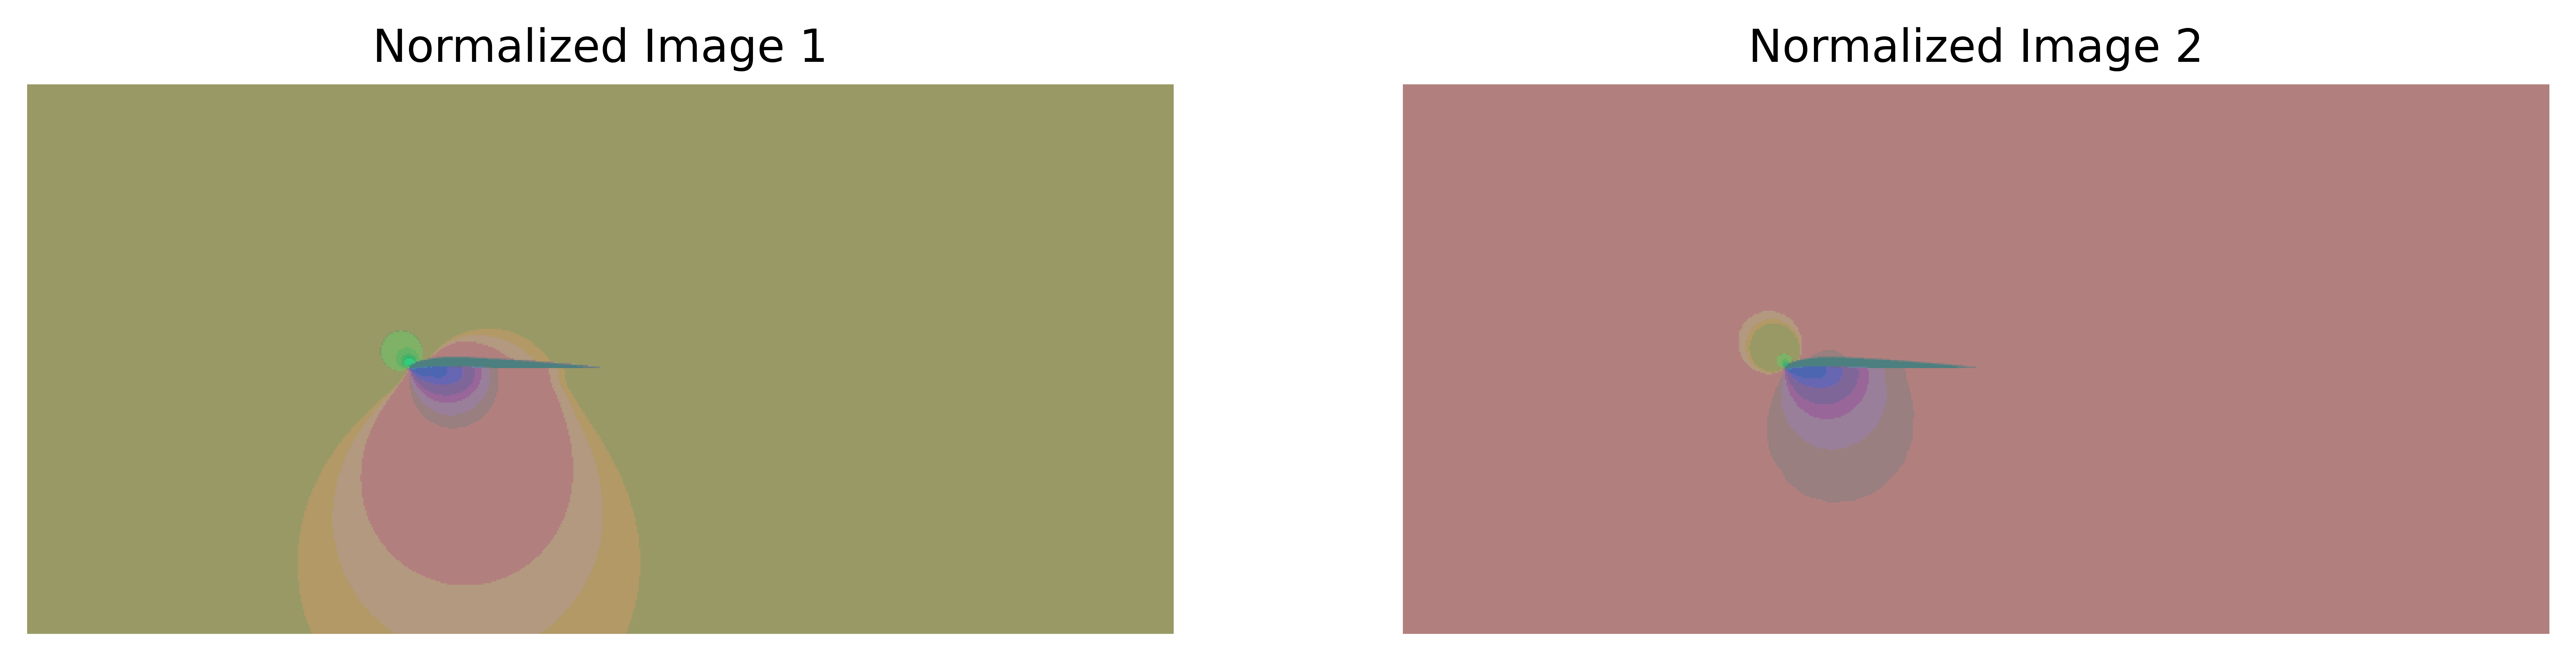

In [38]:

def unique_values_in_normalized_image(masked_img):
    """
    Get the number of unique values in the masked image and normalize it.
    
    Parameters:
    masked_img (numpy.ndarray): The masked image array.
    
    Returns:
    normalized_image_array (numpy.ndarray): Normalized image array with values rounded to 2 decimal places.
    """
    # from image_array get number of unique values 
    unique_values = np.unique(masked_img)
    print(f'Number of unique values in the image: {len(unique_values)}') 
    
    # convert 0 - 255 to 0 - 1
    normalized_image_array = masked_img / 255.0
    
    # round to 2 decimal places
    normalized_image_array = np.round(normalized_image_array, 1)
    
    print(f'Unique values in normalized image array: {np.unique(normalized_image_array)}')
    
    return normalized_image_array
normalized_image1 = unique_values_in_normalized_image(image1)
normalized_image2 = unique_values_in_normalized_image(image2)

# plot the normalized images
plt.figure(figsize=(12, 12), dpi=1000)
plt.subplot(1, 2, 1)
plt.imshow(normalized_image1, cmap='gray')
plt.axis('off')  # Hide axes
plt.title('Normalized Image 1')
plt.subplot(1, 2, 2)
plt.imshow(normalized_image2, cmap='gray')
plt.axis('off')  # Hide axes
plt.title('Normalized Image 2')
plt.show()

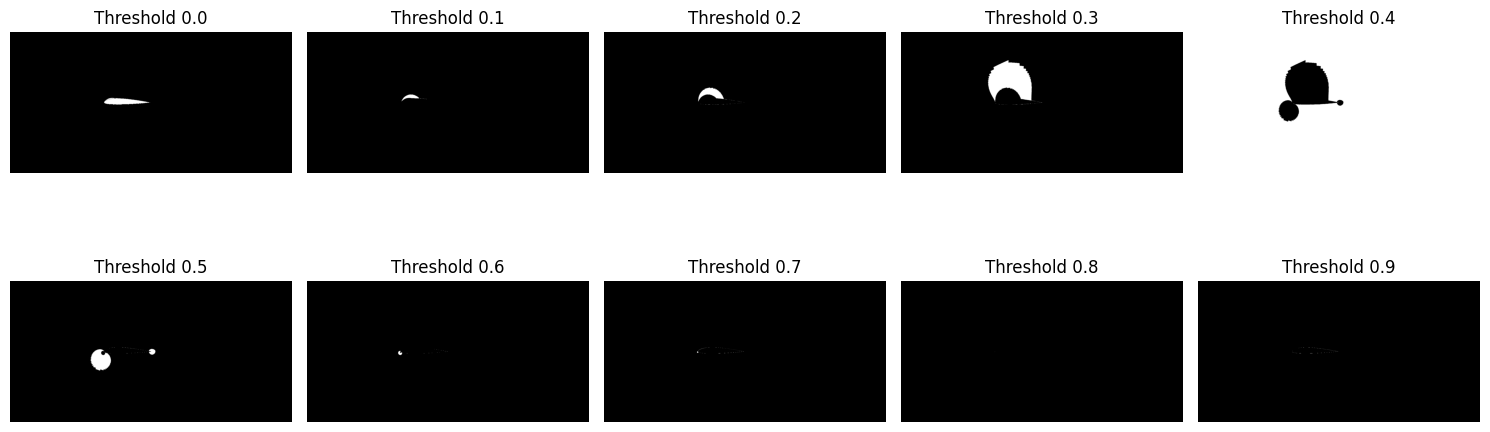

In [ ]:
unique_thresholds = np.unique(normalized_image_array)
n = len(unique_thresholds)
cols = 5
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
axes = axes.flatten()

for idx, i in enumerate(unique_thresholds):
    thresholded_image = (normalized_image_array == i).astype(float)
    axes[idx].imshow(thresholded_image, cmap='gray')
    axes[idx].set_title(f'Threshold {i}')
    axes[idx].axis('off')

# Hide any unused subplots
for idx in range(n, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [ ]:

for idx, i in enumerate(unique_thresholds):
    mask_image = (normalized_image_array == i).astype(float)
    